In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, scipy.stats as stats

In [3]:
plt.rcParams.update({
    "axes.titlesize": 16,   # subplot titles
    "axes.labelsize": 12,   # x/y labels
    "xtick.labelsize": 12,  # x ticks
    "ytick.labelsize": 12,  # y ticks
})

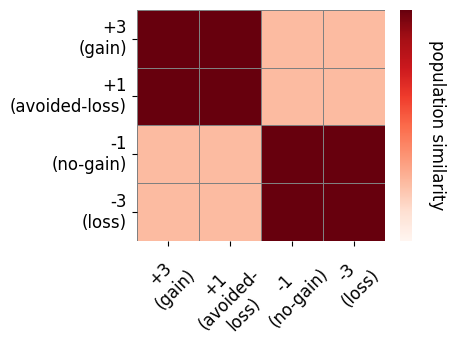

In [22]:
# create 4*4 mtx, hardcoded
data = np.array([[100, 100, 25, 25],
                 [100, 100, 25, 25],
                 [25, 25, 100, 100],
                 [25, 25, 100, 100]])

plt.figure(figsize=(4, 3))
ax = sns.heatmap(data, cmap="Reds", vmin=0, vmax=100, linewidths=.5, linecolor='gray')

# access colorbar and customize label
cbar = ax.collections[0].colorbar
cbar.set_label('population similarity', rotation=270, labelpad=25)  # rotate 270° for vertical label
cbar.set_ticks([])

# set custom tick labels
xtick_labels = ['+3\n(gain)', '+1\n(avoided-\nloss)', '-1\n(no-gain)', '-3\n(loss)']
ytick_labels = ['+3\n(gain)', '+1\n(avoided-loss)', '-1\n(no-gain)', '-3\n(loss)']

ax.set_xticklabels(xtick_labels, rotation=45)
ax.set_yticklabels(ytick_labels, rotation=0)

plt.show()

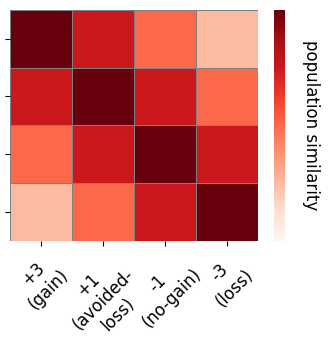

In [28]:
# create 4*4 mtx, hardcoded
data = np.array([[100, 75, 50, 25],
                 [75, 100, 75, 50],
                 [50, 75, 100, 75],
                 [25, 50, 75, 100]])

# data = np.array([[100, 25, 50, 75],
#                  [25, 100, 75, 50],
#                  [50, 75, 100, 75],
#                  [75, 50, 75, 100]])

# data = np.array([[100, 75, 50, 25],
#                  [25, 50, 75, 100],
#                  [50, 75, 100, 75],
#                  [75, 100, 75, 50]])

plt.figure(figsize=(4,3))
ax = sns.heatmap(data, cmap="Reds", vmin=0, vmax=100, linewidths=.5, linecolor='gray')

# access colorbar and customize label
cbar = ax.collections[0].colorbar
cbar.set_label('population similarity', rotation=270, labelpad=25)  # rotate 270° for vertical label
cbar.set_ticks([])

# set custom tick labels
xtick_labels = ['+3\n(gain)', '+1\n(avoided-\nloss)', '-1\n(no-gain)', '-3\n(loss)']
ytick_labels = ['+3\n(gain)', '+1\n(avoided-loss)', '-1\n(no-gain)', '-3\n(loss)']
# xtick_labels = ['','','','']
ytick_labels = ['','','','']

ax.set_xticklabels(xtick_labels, rotation=45)
ax.set_yticklabels(ytick_labels, rotation=0)

plt.show()

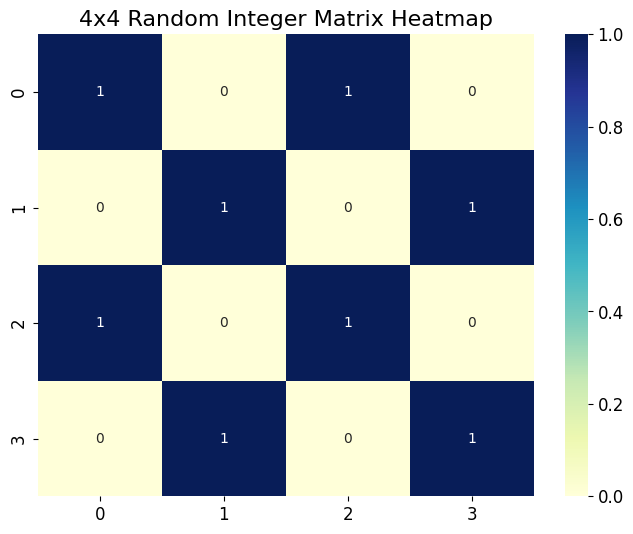

In [6]:
# create 4*4 mtx, hardcoded
data = np.array([[1, 0, 1, 0],
                 [0, 1, 0, 1],
                 [1, 0, 1, 0],
                 [0, 1, 0, 1]])
#plot mtx
# mask upper triangle
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("4x4 Random Integer Matrix Heatmap")
plt.show()

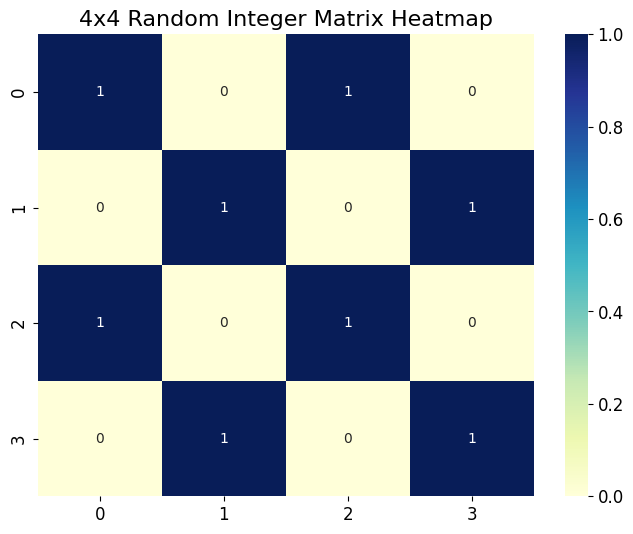

In [7]:
# create 4*4 mtx, hardcoded
data = np.array([[1, 0, 1, 0],
                 [0, 1, 0, 1],
                 [1, 0, 1, 0],
                 [0, 1, 0, 1]])
#plot mtx
# mask upper triangle
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("4x4 Random Integer Matrix Heatmap")
plt.show()

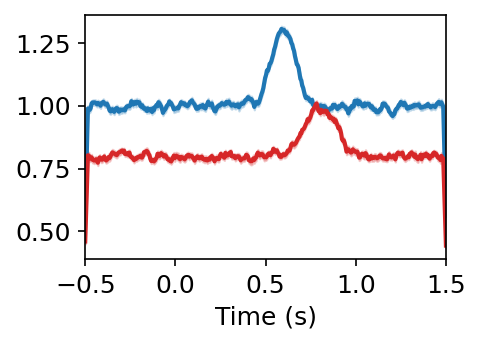

In [8]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)
t = np.linspace(-0.5, 1.5, 400)
n_trials = 60

def smooth(x, k=7):
    k = int(k) | 1
    return np.convolve(x, np.ones(k)/k, mode="same")

# Continuous baseline with mild bumps
base_corr = 1 + 0.3*np.exp(-((t-0.6)/0.1)**2)
base_inc  = 0.8 + 0.2*np.exp(-((t-0.8)/0.12)**2)

corr = np.vstack([smooth(base_corr + 0.25*rng.normal(size=t.size)) for _ in range(n_trials)])
inc  = np.vstack([smooth(base_inc  + 0.25*rng.normal(size=t.size)) for _ in range(n_trials)])

m_c, se_c = corr.mean(0), corr.std(0)/np.sqrt(n_trials)
m_i, se_i = inc.mean(0),  inc.std(0)/np.sqrt(n_trials)

plt.figure(figsize=(3.2, 2.4), dpi=150)
plt.fill_between(t, m_c-se_c, m_c+se_c, alpha=.25, color='C0')
plt.fill_between(t, m_i-se_i, m_i+se_i, alpha=.25, color='C3')
plt.plot(t, m_c, lw=2, color='C0')
plt.plot(t, m_i, lw=2, color='C3')
plt.xlim(-0.5, 1.5)
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()
